# Question

Choose any dataset and perform following & infer the results :
1. Standardize the data.
2. Train K-Nearest Neighbours Model for following K-Values:
   - K=1
   - K=3
   - K=5
   - K=9

# Importing the required modules

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Reading the dataset

In [3]:
wq = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-4_KNN\waterQuality1.csv")

In [4]:
wq.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# Dropping the useless columns

In [6]:
wq['ammonia'].value_counts()['#NUM!']

3

In [7]:
wq.drop(list(wq.index[wq['ammonia'] == '#NUM!']),inplace=True)

In [8]:
wq.reset_index()

,index,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7992,7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7993,7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7994,7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [9]:
wq['ammonia'] = wq['ammonia'].astype('float64')
wq['is_safe'] = wq['is_safe'].astype('object')

In [11]:
wq.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,0.328706,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,0.378113,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


# Seggregation of Variables

In [12]:
target =  'is_safe'

In [13]:
numerical = set(wq.columns).difference(set([target]))

# Standardization

The data is standardized by computing the z-scores using the mean and standard deviation of the particular column. Standardization should be performed only for the numerical columns. However, the StandardScaler in the sckitlearn module will also standardize the cateogrical variables by alloting them an encoding. To prevent this we will use the ColumnTransformer to ensure that only the numerical columns are standardized keeping the category the same.

Finally all the numerical features will have a mean of 0 and standard deviation of 1.

In [14]:
ct = ColumnTransformer([
        ('xyz', StandardScaler(), [i for i in range(len(numerical))])
    ], remainder='passthrough')

In [15]:
wq_scaled = pd.DataFrame(ct.fit_transform(wq[wq.columns]),columns=wq.columns)

In [16]:
wq_scaled.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.777403,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.97305,-1.657446,-0.363345,...,-0.78107,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.91704,1
1,1.306945,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.00246,...,0.009785,-1.409197,1.04696,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023,1
2,0.271572,-0.029083,-0.480875,-0.81234,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,...,-0.36845,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.03531,-1.288728,0
3,0.548198,-0.332067,-0.480875,1.144654,-1.15969,1.968179,-0.802892,1.306793,0.708215,1.184567,...,-1.434385,-1.517469,-0.069511,-0.40196,-0.415275,-0.516695,-1.0317,2.104968,0.198023,1
4,0.200439,1.132165,-0.52046,-1.124801,-1.020982,0.19182,1.635713,-0.361012,-0.371261,-0.575804,...,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.0317,-0.611672,-0.91704,1


# Test-Train Split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(wq_scaled,
    wq_scaled[target],
    test_size = 0.1,
    train_size=0.90,
    random_state = 0
)

In [18]:
X_train.columns.drop(['is_safe'])
X_test.columns.drop(['is_safe'])

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')

# Model Biulding

In [19]:
def KNN(k):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train)
 return knn.score(X_test,y_test),knn.score(X_train,y_train)

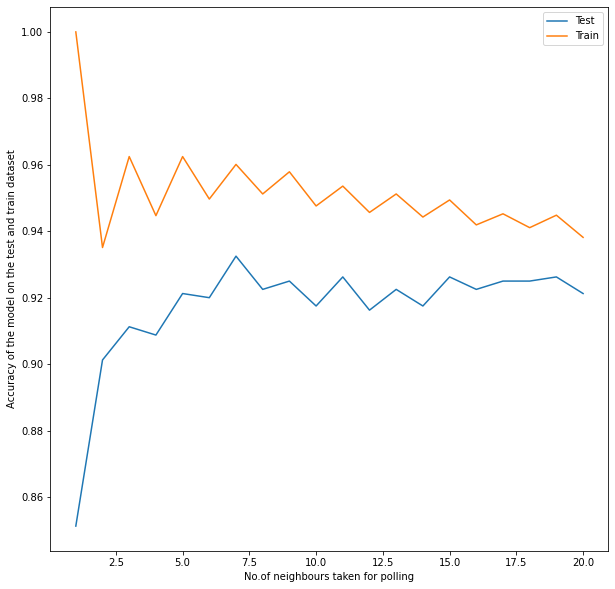

In [27]:
accuracies_test = []
accuracies_train = []
for i in range(1,len(X_train.columns)): 
  accuracies_test.append(KNN(i)[0])
  accuracies_train.append(KNN(i)[1])
plt.figure(figsize=(10,10))
plt.plot(range(1,len(X_train.columns)),accuracies_test)
plt.plot(range(1,len(X_train.columns)),accuracies_train)
plt.xlabel("No.of neighbours taken for polling")
plt.ylabel("Accuracy of the model on the test and train dataset")
plt.legend(['Test','Train'])
plt.show()

Looking at the plot, we can infer that the highest accuracy is achieved at K = 7 and there is less difference between the train and test accuracy. Hence, there is considerably less overfitting at the obtained K value.

# Accuracies for K = 1,3,5,9

In [35]:
for i in [1,3,5,9]:
    final_metrics = KNN(i)
    print("KNN with K =",i)
    print("Accuracy on Test Dataset : ",final_metrics[0])
    print("Accuracy on Train Dataset : ",final_metrics[1])

KNN with K = 1
Accuracy on Test Dataset :  0.85125
Accuracy on Train Dataset :  1.0
KNN with K = 3
Accuracy on Test Dataset :  0.91125
Accuracy on Train Dataset :  0.962479155086159
KNN with K = 5
Accuracy on Test Dataset :  0.92125
Accuracy on Train Dataset :  0.962479155086159
KNN with K = 9
Accuracy on Test Dataset :  0.925
Accuracy on Train Dataset :  0.957893274041134


# Final Model

In [33]:
final_metrics = KNN(7)
print("Accuracy on Test Dataset : ",final_metrics[0])
print("Accuracy on Train Dataset : ",final_metrics[1])

Accuracy on Test Dataset :  0.9325
Accuracy on Train Dataset :  0.9601167315175098
